<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/EDH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolvamos

$1)$ $X''- kX=0$, $X(0)=X(1)=0$

$2)$ $X''- kX=0$, $X'(0)=X'(1)=0$

Importamos las librerías

In [6]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Definimos nuestra función y la variable



In [7]:
x, k = sp.symbols('x k', real=True)
X = sp.Function('X')

Resolvemos la ecuación diferencial y obtenemos

In [8]:
ode = sp.Eq(X(x).diff(x, 2) + k*X(x), 0)
general_solution = sp.dsolve(ode, X(x))
C1, C2 = sp.symbols('C1 C2')
X_sol = general_solution.rhs

Ahora las condiciones iniciales

In [9]:
def solve_sturm_liouville_bc(boundary_conditions, title):
    eqs = []
    for bc in boundary_conditions:
        eqs.append(sp.Eq(bc.subs(X(x), X_sol).doit(), 0))

    sol_constants = sp.solve(eqs, (C1, C2), dict=True)

    X1 = sp.sin(sp.sqrt(k)*x)
    X2 = sp.cos(sp.sqrt(k)*x)
    X_trial = C1*X1 + C2*X2
    M = sp.Matrix([
        [X_trial.subs(x, 0).coeff(C1), X_trial.subs(x, 0).coeff(C2)],
        [X_trial.subs(x, 1).coeff(C1), X_trial.subs(x, 1).coeff(C2)]
    ])
    det = M.det()

    k_vals = sp.solve(det, k)

    print(f'\n{title}')
    print(f'Autovalores encontrados: {k_vals}')

    f = sp.lambdify(x, X_trial.subs({C1: 1, C2: 0}), modules='numpy')
    return k_vals, X_trial


Para el primer caso, es decir, $X(0)=X(1)=0$

In [10]:
k1_vals, X1_trial = solve_sturm_liouville_bc(
    boundary_conditions=[X(x).subs(x, 0), X(x).subs(x, 1)],
    title="Caso 1: X(0)=0, X(1)=0"
)


Caso 1: X(0)=0, X(1)=0
Autovalores encontrados: [0, pi**2]


Para el segundo caso, es decir, $X'(0)=X'(1)=0$

In [11]:
dX = X_sol.diff(x)
k2_vals, X2_trial = solve_sturm_liouville_bc(
    boundary_conditions=[dX.subs(x, 0), dX.subs(x, 1)],
    title="Caso 2: X'(0)=0, X'(1)=0"
)


Caso 2: X'(0)=0, X'(1)=0
Autovalores encontrados: [0, pi**2]


Graficamos las soluciones, para el primer caso $n$ desde $1$ hasta $5$ y para el segundo caso $n$ desde $0$ hasta $4$

Calculamos cada función para $n$ y hacemos la distinción para cada caso sobre si utilizar $cos$ o $sen$

Finalmente dibujamos la gráfica

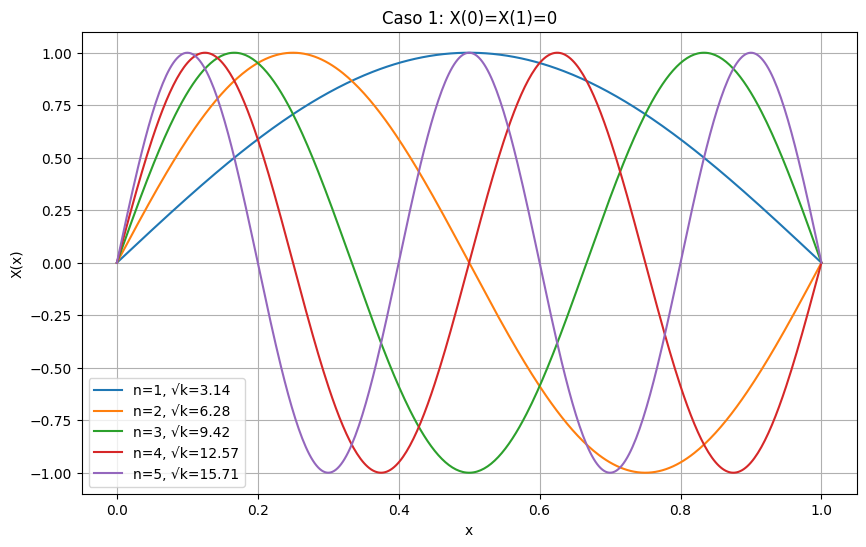

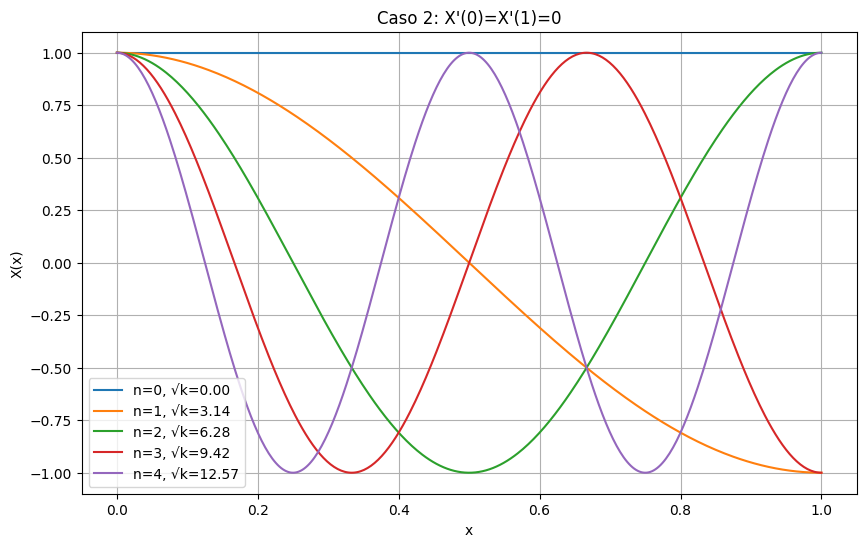

In [39]:
def plot_sturm_liouville(title, is_cosine_based):
    x_vals = np.linspace(0, 1, 400)
    plt.figure(figsize=(10, 6))

    n_values = range(1, 6) if not is_cosine_based else range(0, 5)

    for n in n_values:
        k_n = (n * np.pi) ** 2
        sqrt_k = np.sqrt(k_n)

        y_vals = np.cos(sqrt_k * x_vals) if is_cosine_based else np.sin(sqrt_k * x_vals)
        plt.plot(x_vals, y_vals, label=f'n={n}, √k={sqrt_k:.2f}')

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('X(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_sturm_liouville('Caso 1: X(0)=X(1)=0', is_cosine_based=False)
plot_sturm_liouville('Caso 2: X\'(0)=X\'(1)=0', is_cosine_based=True)